<a href="https://colab.research.google.com/github/MariamKhan98/mariamkhan98/blob/main/Employee_Turnover_Analytics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
#Check for missing values - No null values.
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
sales,0
salary,0


In [ ]:
#check for duplicate rows and remove them.
df.duplicated().sum()
duplicates = df[df.duplicated()]
print(duplicates.head())


      satisfaction_level  last_evaluation  number_project  \
396                 0.46             0.57               2   
866                 0.41             0.46               2   
1317                0.37             0.51               2   
1368                0.41             0.52               2   
1461                0.42             0.53               2   

      average_montly_hours  time_spend_company  Work_accident  left  \
396                    139                   3              0     1   
866                    128                   3              0     1   
1317                   127                   3              0     1   
1368                   132                   3              0     1   
1461                   142                   3              0     1   

      promotion_last_5years       sales  salary  
396                       0       sales     low  
866                       0  accounting     low  
1317                      0       sales  medium  
1368  

In [ ]:
#remove duplicates
df= df.drop_duplicates()
df.duplicated().sum()


0

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.tail()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
11986,0.90,0.55,3,259,10,1,0,1,management,high
11987,0.74,0.95,5,266,10,0,0,1,management,high
11988,0.85,0.54,3,185,10,0,0,1,management,high
11989,0.33,0.65,3,172,10,0,0,1,marketing,high
11990,0.50,0.73,4,180,3,0,0,0,IT,low


In [ ]:
#Draw a heatmap of the correlation matrix between all numerical
#features or columns in the data.
df_encoded = pd.get_dummies(df, columns=['sales', 'salary'], drop_first=True)


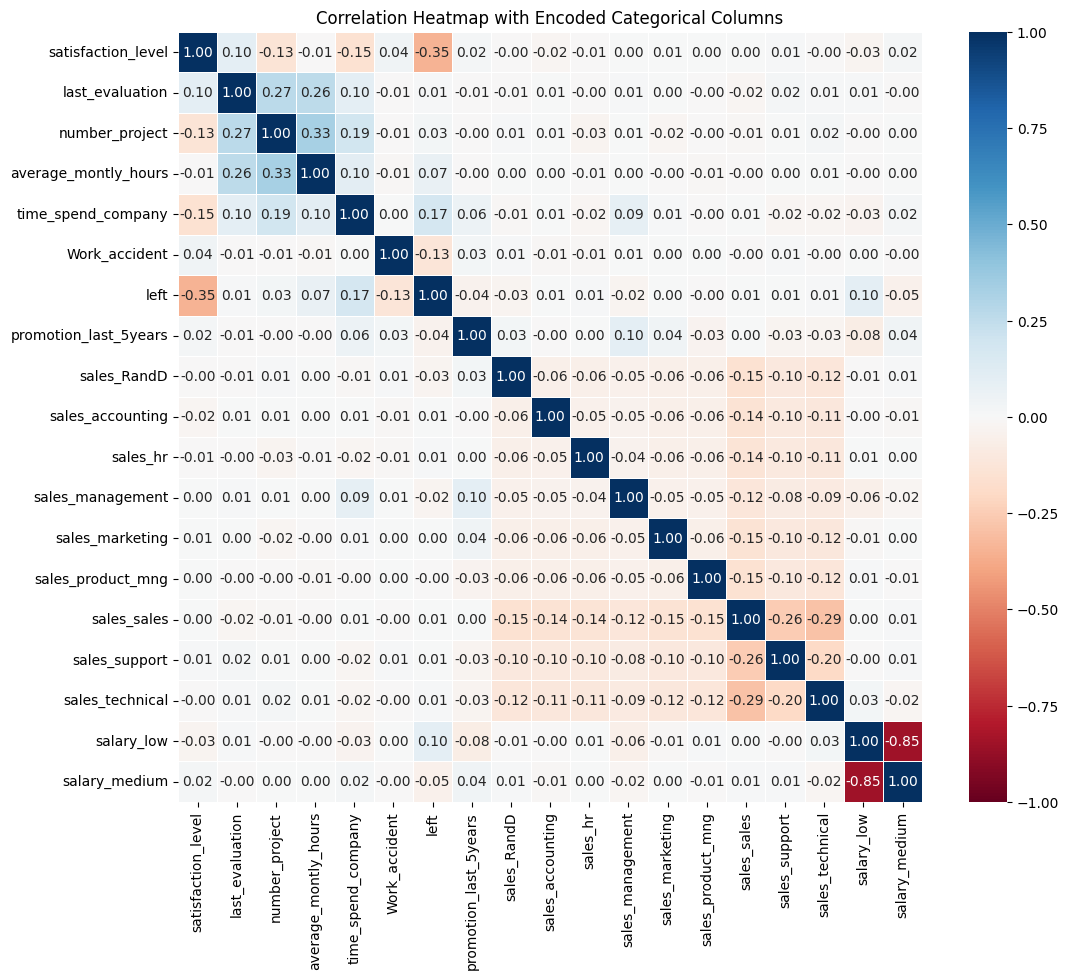

In [ ]:
corr = df_encoded.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='RdBu', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap with Encoded Categorical Columns')
plt.show()

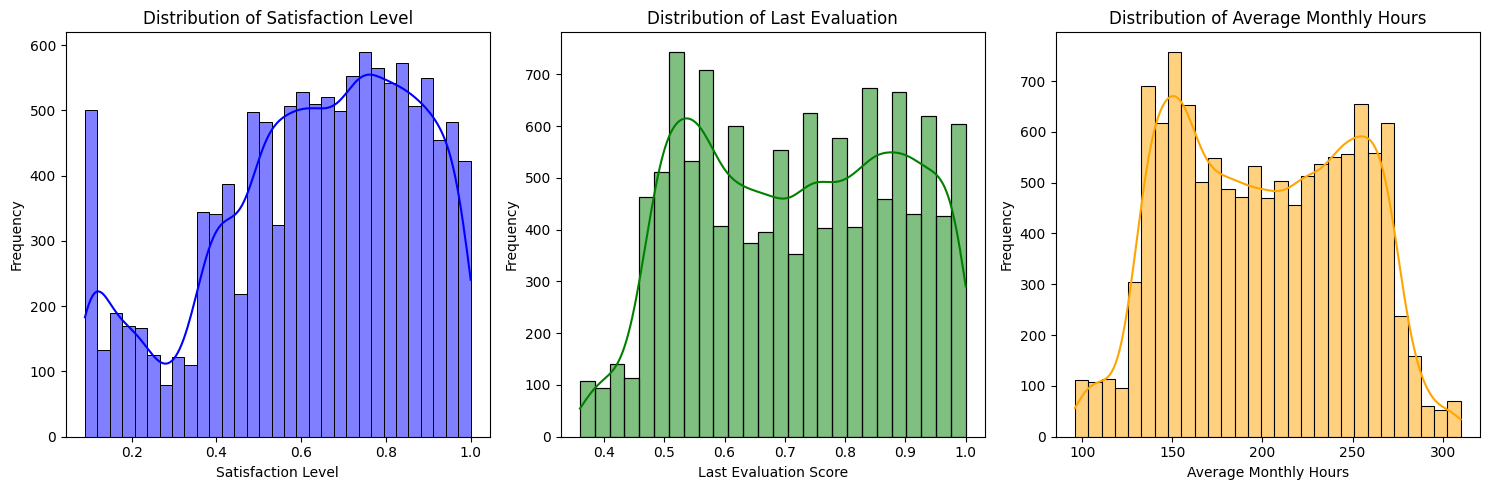

In [ ]:
#create distribution plots. histogram and kdeplot

# Set up the figure and axes
plt.figure(figsize=(15, 5))

# Plot 1: Distribution of satisfaction_level
plt.subplot(1, 3, 1)
sns.histplot(df['satisfaction_level'], kde=True, color='blue')
plt.title('Distribution of Satisfaction Level')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')

# Plot 2: Distribution of last_evaluation
plt.subplot(1, 3, 2)
sns.histplot(df['last_evaluation'], kde=True, color='green')
plt.title('Distribution of Last Evaluation')
plt.xlabel('Last Evaluation Score')
plt.ylabel('Frequency')

# Plot 3: Distribution of average_montly_hours
plt.subplot(1, 3, 3)
sns.histplot(df['average_montly_hours'], kde=True, color='orange')
plt.title('Distribution of Average Monthly Hours')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Frequency')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

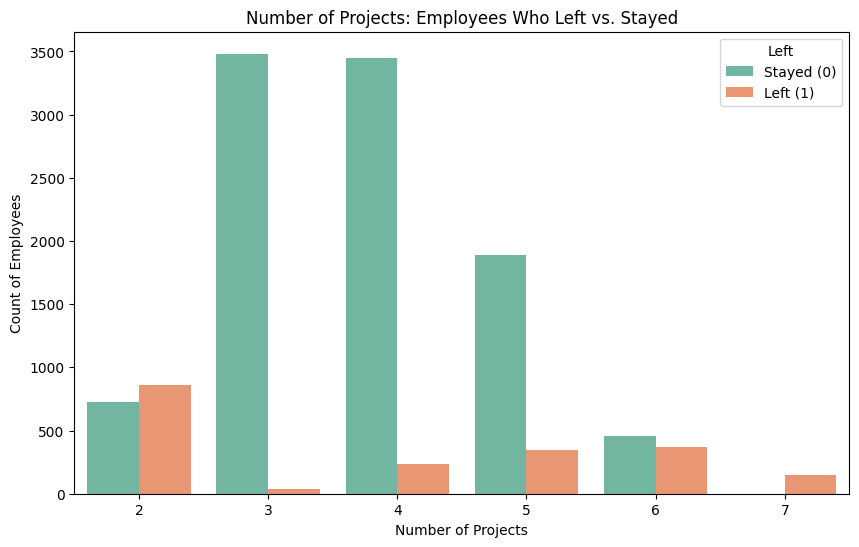

In [ ]:
# Set up the figure size
plt.figure(figsize=(10, 6))

# Create the countplot
sns.countplot(x='number_project', hue='left', data=df, palette='Set2')

# Add titles and labels
plt.title('Number of Projects: Employees Who Left vs. Stayed')
plt.xlabel('Number of Projects')
plt.ylabel('Count of Employees')
plt.legend(title='Left', labels=['Stayed (0)', 'Left (1)'])

# Display the plot
plt.show()

<ipython-input-27-d0990d2d327d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_left['cluster'] = kmeans.fit_predict(X)


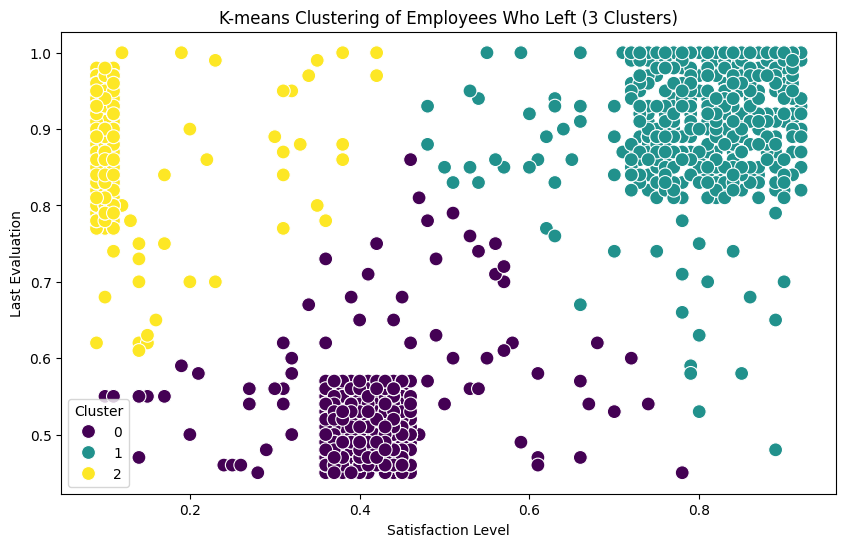

Cluster Centers:
[[0.41013304 0.51719512]
 [0.80587387 0.91257658]
 [0.1111985  0.86906367]]


In [ ]:
from sklearn.cluster import KMeans

# Step 1: Filter the data for employees who left (left=1)
df_left = df[df['left'] == 1]

# Step 2: Select the columns for clustering
X = df_left[['satisfaction_level', 'last_evaluation']]

# Step 3: Perform K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df_left['cluster'] = kmeans.fit_predict(X)

# Step 4: Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='satisfaction_level', y='last_evaluation', hue='cluster', data=df_left, palette='viridis', s=100)
plt.title('K-means Clustering of Employees Who Left (3 Clusters)')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.legend(title='Cluster')
plt.show()

# Step 5: Analyze the clusters
cluster_centers = kmeans.cluster_centers_
print("Cluster Centers:")
print(cluster_centers)

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

df_encoded

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,False,False,False,False,True,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,False,False,False,False,False,False,True,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,False,False,False,False,False,False,True,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11986,0.90,0.55,3,259,10,1,0,1,False,False,False,True,False,False,False,False,False,False,False
11987,0.74,0.95,5,266,10,0,0,1,False,False,False,True,False,False,False,False,False,False,False
11988,0.85,0.54,3,185,10,0,0,1,False,False,False,True,False,False,False,False,False,False,False
11989,0.33,0.65,3,172,10,0,0,1,False,False,False,False,True,False,False,False,False,False,False


In [ ]:

# Step 1: Separate categorical and numerical columns
categorical_columns = ['sales', 'salary']
numerical_columns = ['satisfaction_level', 'last_evaluation', 'number_project',
                     'average_montly_hours', 'time_spend_company', 'Work_accident',
                     'promotion_last_5years']

# Step 2: Convert categorical columns to numerical using get_dummies()
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Step 3: Separate features (X) and target (y)
X = df_encoded.drop('left', axis=1)
y = df_encoded['left']

# Step 4: Perform a stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 5: Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
print("Class distribution before SMOTE:")
print(y_train.value_counts())

print("\nClass distribution after SMOTE:")
print(y_train_resampled.value_counts())

Class distribution before SMOTE:
left
0    7999
1    1593
Name: count, dtype: int64

Class distribution after SMOTE:
left
0    7999
1    7999
Name: count, dtype: int64


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     10000
           1       0.50      0.21      0.29      1991

    accuracy                           0.83     11991
   macro avg       0.68      0.58      0.60     11991
weighted avg       0.80      0.83      0.80     11991



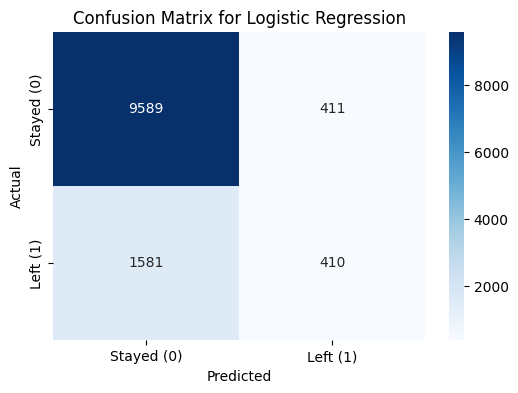

In [ ]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Function to plot classification report
def plot_classification_report(y_true, y_pred, model_name):
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_true, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed (0)', 'Left (1)'], yticklabels=['Stayed (0)', 'Left (1)'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Step 5.1: Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=1000)
y_pred_log_reg = cross_val_predict(log_reg, X, y, cv=cv)
plot_classification_report(y, y_pred_log_reg, "Logistic Regression")

Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     10000
           1       0.99      0.92      0.95      1991

    accuracy                           0.98     11991
   macro avg       0.99      0.96      0.97     11991
weighted avg       0.98      0.98      0.98     11991



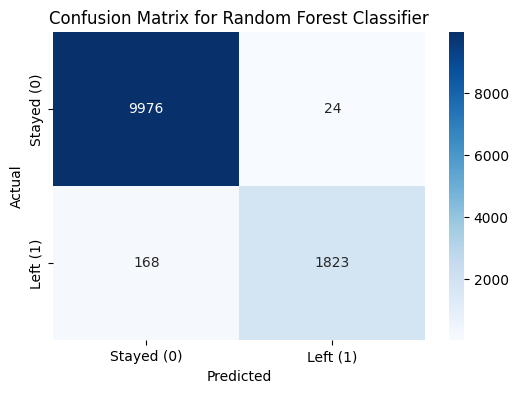

In [ ]:
# Step 5.2: Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
y_pred_rf = cross_val_predict(rf, X, y, cv=cv)
plot_classification_report(y, y_pred_rf, "Random Forest Classifier")

Classification Report for Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     10000
           1       0.96      0.93      0.94      1991

    accuracy                           0.98     11991
   macro avg       0.97      0.96      0.97     11991
weighted avg       0.98      0.98      0.98     11991



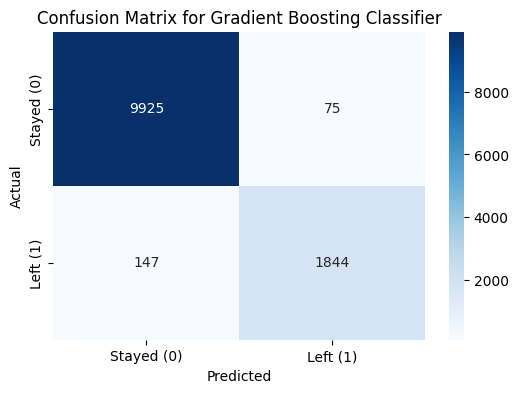

In [ ]:

# Step 5.3: Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)
y_pred_gb = cross_val_predict(gb, X, y, cv=cv)
plot_classification_report(y, y_pred_gb, "Gradient Boosting Classifier")


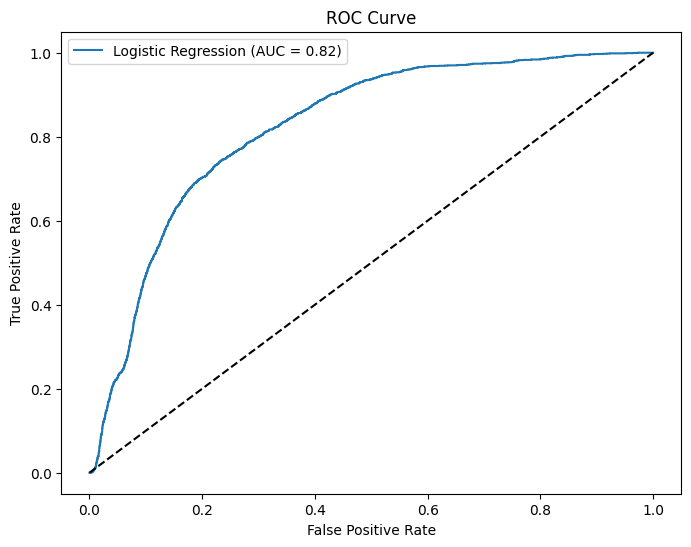

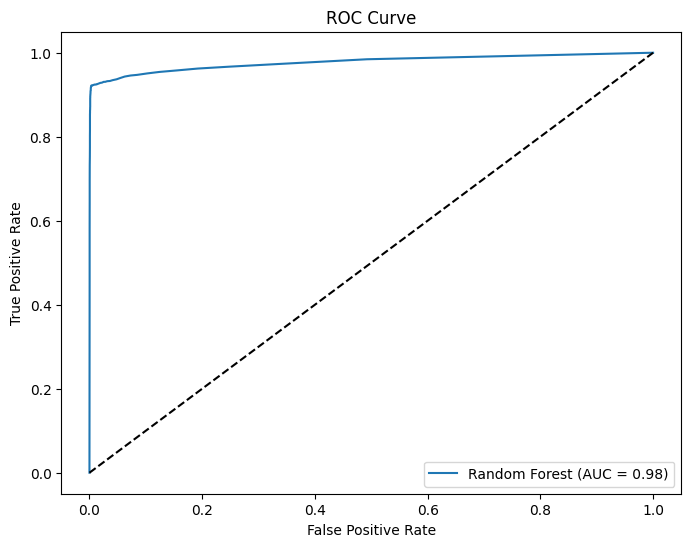

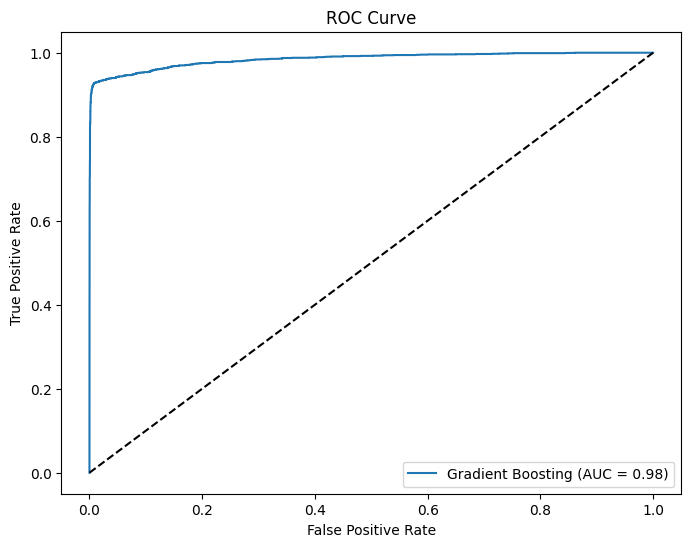

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score


# Function to plot ROC curve
def plot_roc_curve(y_true, y_pred_prob, model_name):
    fpr, tpr, thresholds = roc_curve(y/_true, y_pred_prob)
    auc = roc_auc_score(y_true, y_pred_prob)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

# Get predicted probabilities for the positive class (left=1)
y_pred_prob_rf = cross_val_predict(rf, X, y, cv=cv, method='predict_proba')[:, 1]
y_pred_prob_gb = cross_val_predict(gb, X, y, cv=cv, method='predict_proba')[:, 1]
y_pred_prob_log_reg = cross_val_predict(log_reg, X, y, cv=cv, method='predict_proba')[:, 1]

# Plot ROC curves
plot_roc_curve(y, y_pred_prob_log_reg, "Logistic Regression")
plot_roc_curve(y, y_pred_prob_rf, "Random Forest")
plot_roc_curve(y, y_pred_prob_gb, "Gradient Boosting")

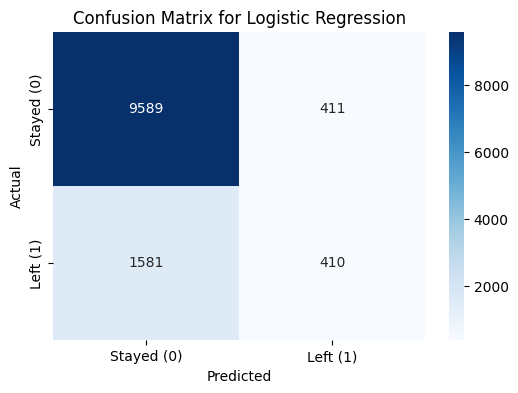

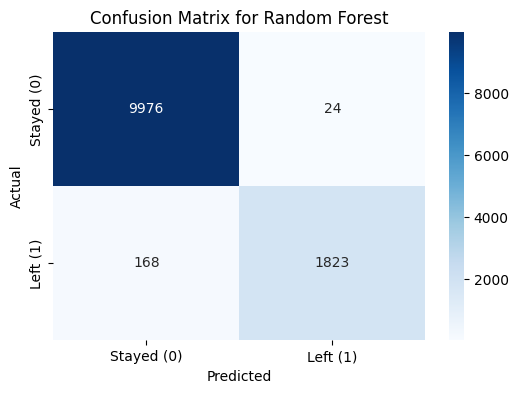

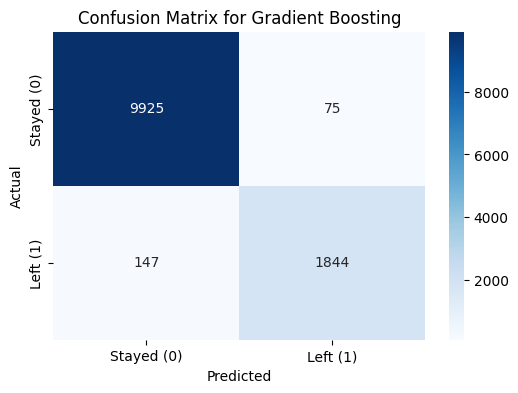

In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed (0)', 'Left (1)'], yticklabels=['Stayed (0)', 'Left (1)'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(y, y_pred_log_reg, "Logistic Regression")
plot_confusion_matrix(y, y_pred_rf, "Random Forest")
plot_confusion_matrix(y, y_pred_gb, "Gradient Boosting")

# Which Metric to Use?
In this problem, **Recall** is more important because:

The goal is to identify as many employees who are likely to leave as possible (minimize false negatives).

Missing employees who are likely to leave (false negatives) is more costly than incorrectly flagging employees who might stay (false positives).



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Train the model on the resampled training data
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict probabilities for the test data
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]  # Probability of leaving (left=1)

# Add the probabilities to the test data
X_test['turnover_probability'] = y_pred_prob_rf

In [ ]:
# Categorize employees into risk zones
def categorize_risk(prob):
    if prob < 0.2:
        return 'Safe Zone (Green)'
    elif 0.2 <= prob < 0.6:
        return 'Low-Risk Zone (Yellow)'
    elif 0.6 <= prob < 0.9:
        return 'Medium-Risk Zone (Orange)'
    else:
        return 'High-Risk Zone (Red)'

X_test['risk_zone'] = X_test['turnover_probability'].apply(categorize_risk)

# Display the distribution of risk zones
print(X_test['risk_zone'].value_counts())

risk_zone
Safe Zone (Green)            1906
High-Risk Zone (Red)          356
Low-Risk Zone (Yellow)        119
Medium-Risk Zone (Orange)      18
Name: count, dtype: int64


In [ ]:
# Retention strategies for each zone
retention_strategies = {
    'Safe Zone (Green)': [
        "Maintain engagement through regular feedback and recognition.",
        "Offer career development opportunities to keep employees motivated."
    ],
    'Low-Risk Zone (Yellow)': [
        "Conduct one-on-one meetings to understand concerns.",
        "Provide flexible work hours or remote work options.",
        "Offer training programs to enhance skills and job satisfaction."
    ],
    'Medium-Risk Zone (Orange)': [
        "Address specific issues like workload or role clarity.",
        "Offer retention bonuses or financial incentives.",
        "Pair employees with mentors for guidance and support."
    ],
    'High-Risk Zone (Red)': [
        "Conduct exit interviews to understand reasons for leaving.",
        "Take immediate action (e.g., role changes, promotions, or salary adjustments).",
        "Identify replacements or backups to minimize disruption."
    ]
}

# Display retention strategies for each zone
for zone, strategies in retention_strategies.items():
    print(f"\nRetention Strategies for {zone}:")
    for strategy in strategies:
        print(f"- {strategy}")


Retention Strategies for Safe Zone (Green):
- Maintain engagement through regular feedback and recognition.
- Offer career development opportunities to keep employees motivated.

Retention Strategies for Low-Risk Zone (Yellow):
- Conduct one-on-one meetings to understand concerns.
- Provide flexible work hours or remote work options.
- Offer training programs to enhance skills and job satisfaction.

Retention Strategies for Medium-Risk Zone (Orange):
- Address specific issues like workload or role clarity.
- Offer retention bonuses or financial incentives.
- Pair employees with mentors for guidance and support.

Retention Strategies for High-Risk Zone (Red):
- Conduct exit interviews to understand reasons for leaving.
- Take immediate action (e.g., role changes, promotions, or salary adjustments).
- Identify replacements or backups to minimize disruption.
